import sys
!{sys.executable} -m pip install pydot

In [131]:
import pandas as pd
import scipy
from scipy.stats import skew
import matplotlib.pyplot as plt
import numpy as np
import networkx
import networkx.convert_matrix as nx
import pyvis
import graphviz
from pyvis.network import Network
import pyvis.network as net
import pydot
import random
import time
from matplotlib.ticker import ScalarFormatter

# https://towardsdatascience.com/social-network-analysis-from-theory-to-applications-with-python-d12e9a34c2c7
# https://github.com/ewenme/transfers
# https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
# https://github.com/MridulS/pydata-networkx
# https://datapane.com/u/khuyentran1401/reports/63OQaRk/pyvis-visualize-interactive-network-graphs-in-python/

In [231]:
year = "2019"

In [232]:
BuLi19 = pd.read_csv(year+"_german_bundesliga_1.csv")


In [2]:
BuLi19 = pd.read_csv(year+"_german_bundesliga_1.csv")
PL19 = pd.read_csv("2019_english_premier_league.csv")
SA19 = pd.read_csv("2019_italian_serie_a.csv")
PD19 = pd.read_csv("2019_spanish_primera_division.csv")
L1_19 = pd.read_csv("2019_french_ligue_1.csv")
NOS19 = pd.read_csv("2019_portugese_liga_nos.csv")
Ere19 = pd.read_csv("2019_dutch_eredivisie.csv")
EC19 = pd.read_csv("2019_english_championship.csv")
Rus19 = pd.read_csv("2019_russian_premier_liga.csv")

In [3]:
PL19["club_name"].iloc[500:550]

500          Aston Villa
501          Aston Villa
502          Aston Villa
503          Aston Villa
504          Aston Villa
505          Aston Villa
506          Aston Villa
507          Aston Villa
508          Aston Villa
509          Aston Villa
510          Aston Villa
511          Aston Villa
512          Aston Villa
513          Aston Villa
514          Aston Villa
515          Aston Villa
516          Aston Villa
517          Aston Villa
518          Aston Villa
519          Aston Villa
520          Aston Villa
521          Aston Villa
522          Aston Villa
523          Aston Villa
524          Aston Villa
525          Aston Villa
526          Aston Villa
527          Aston Villa
528      Manchester City
529      Manchester City
530      Manchester City
531         Liverpool FC
532         Liverpool FC
533         Liverpool FC
534           Chelsea FC
535           Chelsea FC
536           Chelsea FC
537           Chelsea FC
538           Chelsea FC
539           Chelsea FC


In [4]:
DF19 = pd.concat([BuLi19, PL19, SA19,
                  PD19, L1_19, NOS19, 
                  Ere19, EC19, Rus19])

In [5]:
DF19.shape

(7279, 12)

In [6]:
DF19["club_name"].isin(["Leicester City"])

0      False
1      False
2      False
3      False
4      False
       ...  
582    False
583    False
584    False
585    False
586    False
Name: club_name, Length: 7279, dtype: bool

In [7]:
DF19

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Bayern Munich,Lucas Hernández,23,Centre-Back,Atlético Madrid,£72.00m,in,Summer,72.00,1 Bundesliga,2019,2019/2020
1,Bayern Munich,Benjamin Pavard,23,Right-Back,VfB Stuttgart,£31.50m,in,Summer,31.50,1 Bundesliga,2019,2019/2020
2,Bayern Munich,Michaël Cuisance,20,Central Midfield,Bor. M'gladbach,£10.80m,in,Summer,10.80,1 Bundesliga,2019,2019/2020
3,Bayern Munich,Philippe Coutinho,27,Attacking Midfield,FC Barcelona,Loan fee:£7.65m,in,Summer,7.65,1 Bundesliga,2019,2019/2020
4,Bayern Munich,Ivan Perisic,30,Left Winger,Inter,Loan fee:£4.50m,in,Summer,4.50,1 Bundesliga,2019,2019/2020
...,...,...,...,...,...,...,...,...,...,...,...,...
582,FC Sochi,Giannelli Imbula,27,Defensive Midfield,Stoke City,Free transfer,in,Winter,0.00,Premier Liga,2019,2019/2020
583,FC Sochi,Aleksandr Kokorin,28,Centre-Forward,Zenit S-Pb,Loan,in,Winter,0.00,Premier Liga,2019,2019/2020
584,FC Sochi,Fedor Kudryashov,32,Left-Back,Antalyaspor,Free transfer,out,Winter,0.00,Premier Liga,2019,2019/2020
585,FC Sochi,Evgeniy Frolov,31,Goalkeeper,KS Samara,Free transfer,out,Winter,0.00,Premier Liga,2019,2019/2020


In [8]:
## There is a problem with "double names", e.g. Leicester and Leicester City
def Change(DF,old,new):
    DF.loc[DF["club_name"].isin([old]), ["club_name"]] = new
    DF.loc[DF["club_involved_name"].isin([old]), ["club_involved_name"]] = new
    return DF

In [9]:
old = ["Leicester", "SC Paderborn", "Real Betis", "Sassuolo", "Liverpool", "Watford", "Queens Park Rangers",
       "Brighton & Hove Albion", "Manchester United", "Inter", "UC Sampdoria", "Genoa", "Juventus FC", "Braga",
      "Zenit S-Pb", "Valencia CF", "Marseille", "Espanyol", "Villarreal", "Getafe", "Toulouse", "Cardiff",
      "Paris Saint-Germain", "SL Benfica", "R. Strasbourg", "Racing Club", "Spartak Moscow", "Ajax Amsterdam",
      "Feyenoord Rotterdam", "Dijon FCO", "F. Düsseldorf", "Man City", "E. Frankfurt", "West Ham United",
      "Huddersfield Town", "Charlton", "Nottm Forest", "Swansea", "SS Lazio", "Arsenal FC", "Newcastle",
      "Chelsea FC", "Vitesse Arnheim", "Heerenveen"]

In [10]:
new = ["Leicester City", "SC Paderborn 07", "Real Betis Balompié", "US Sassuolo", "Liverpool FC", "Watford FC",
      "QPR", "Brighton", "Man Utd", "Inter Milan", "Sampdoria", "Genoa CFC", "Juventus", "SC Braga", 
       "Zenit St. Petersburg", "Valencia", "Olympique Marseille", "RCD Espanyol Barcelona", "Villarreal CF", 
       "Getafe CF", "FC Toulouse", "Cardiff City", "Paris SG", "Benfica", "RC Strasbourg Alsace", "RC Strasbourg Alsace",
      "Spartak", "Ajax", "Feyenoord", "Dijon", "Fortuna Düsseldorf", "Manchester City","Eintracht Frankfurt", "West Ham",
       "Huddersfield","Charlton Athletic", "Nottingham Forest", "Swansea City", "Lazio", "Arsenal", "Newcastle United",
       "Chelsea","Vitesse", "SC Heerenveen"]

In [11]:
for i in range(len(new)):
    DF19 = Change(DF19, old[i], new[i])


In [12]:
sum(DF19["club_involved_name"].isin(old))

0

## Clean the Data

In [13]:
def DelCol(DF):
    DF = DF.loc[DF["transfer_movement"]=="in"] # only one direction of transfers should be considered
    DF = DF.loc[DF["fee_cleaned"]>0] # only "real" transfers
    del DF["player_name"]
    del DF["transfer_movement"]
    del DF["age"]
    del DF["position"]
    del DF["fee"]
    del DF["league_name"]
    del DF["transfer_period"]
    del DF["year"]
    del DF["season"]
    return(DF)



In [14]:
DF19 = DelCol(DF19)

In [15]:
BuLi19["colour"] = "red"
print(BuLi19)

             club_name        player_name  age            position  \
0        Bayern Munich    Lucas Hernández   23         Centre-Back   
1        Bayern Munich    Benjamin Pavard   23          Right-Back   
2        Bayern Munich   Michaël Cuisance   20    Central Midfield   
3        Bayern Munich  Philippe Coutinho   27  Attacking Midfield   
4        Bayern Munich       Ivan Perisic   30         Left Winger   
..                 ...                ...  ...                 ...   
585  1.FC Union Berlin        Yunus Malli   27  Attacking Midfield   
586  1.FC Union Berlin      Lennart Moser   20          Goalkeeper   
587  1.FC Union Berlin    Lennard Maloney   20         Centre-Back   
588  1.FC Union Berlin       Nicolai Rapp   23         Centre-Back   
589  1.FC Union Berlin      Lennart Moser   20          Goalkeeper   

    club_involved_name                      fee transfer_movement  \
0      Atlético Madrid                  £72.00m                in   
1        VfB Stuttgar

### Combine multiple transfers between clubs a and b

In [16]:
# now as a function
        
def AddFees(DF): # adds fees of multiple transfers from club a to b
    # output
    DF_out = pd.DataFrame({'club_name' : [],
                         "club_involved_name":[],
                         "fee_cleaned":[]})
    
    for i in range(DF.shape[0]):
        # is this a new match?
        if DF_out.loc[(DF_out["club_name"]== DF["club_name"].iloc[i])&  
                     DF_out["club_involved_name"].isin([DF["club_involved_name"].iloc[i]])].size ==0:
            DF_out = DF_out.append(DF.iloc[i])
        else:
            # add fee value to already existing value
            DF_out["fee_cleaned"].loc[(DF_out["club_name"]== DF["club_name"].iloc[i])&  
                     DF_out["club_involved_name"].isin([DF["club_involved_name"].iloc[i]])] += DF["fee_cleaned"].iloc[i]
            
    return(DF_out)    
        

In [17]:
DF19 = AddFees(DF19)

/home/users/t_wand01/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
DF19

,club_name,club_involved_name,fee_cleaned
0,Bayern Munich,Atlético Madrid,72.000
1,Bayern Munich,VfB Stuttgart,31.500
2,Bayern Munich,Bor. M'gladbach,10.800
3,Bayern Munich,FC Barcelona,7.650
4,Bayern Munich,Inter Milan,4.500
...,...,...,...
537,Dynamo Moscow,Mladá Boleslav,3.150
545,Krylya Sovetov Samara,Al-Shorta SC,0.135
558,FK Ufa,Loko Tashkent,0.180
559,FK Ufa,Anzhi,0.162


## Second Data Set: Undirected
Combine both transfer fees from A to B and B to A as one "transfer volume"

In [19]:
DFun19 =  pd.DataFrame({'club1' : [],
                         "club2":[],
                         "fee_cleaned":[]})

In [20]:
DFun19["club1"] = np.minimum(DF19['club_name'], DF19['club_involved_name']) 
DFun19["club2"] = np.maximum(DF19['club_name'], DF19['club_involved_name']) 

In [21]:
       
def AddFeesUndirected(DF): # adds fees of multiple transfers from club a to b
    # output
    DF_out = pd.DataFrame({'club_name' : [],
                         "club_involved_name":[],
                         "fee_cleaned":[]})
    
    for i in range(DF.shape[0]):
        # is this a new match?
        
        if ((DF_out.loc[(DF_out["club_name"]== DF["club_name"].iloc[i])&  
                     DF_out["club_involved_name"].isin([DF["club_involved_name"].iloc[i]])].size ==0) and 
            (DF_out.loc[(DF_out["club_involved_name"]== DF["club_name"].iloc[i])&  # Neither direction!
                     DF_out["club_name"].isin([DF["club_involved_name"].iloc[i]])].size ==0)):
            DF_out = DF_out.append(DF.iloc[i])
        
        elif (DF_out.loc[(DF_out["club_name"]== DF["club_name"].iloc[i])&  
                     DF_out["club_involved_name"].isin([DF["club_involved_name"].iloc[i]])].size > 0):
            # add fee value to already existing value
            DF_out["fee_cleaned"].loc[(DF_out["club_name"]== DF["club_name"].iloc[i])&  
                     DF_out["club_involved_name"].isin([DF["club_involved_name"].iloc[i]])] += DF["fee_cleaned"].iloc[i]
        
        else: # add the "reversed" fee to existing value
            DF_out["fee_cleaned"].loc[(DF_out["club_involved_name"]== DF["club_name"].iloc[i])&  
                     DF_out["club_name"].isin([DF["club_involved_name"].iloc[i]])] += DF["fee_cleaned"].iloc[i]
            
            
    return(DF_out)    
        

In [22]:
DFun19 = AddFeesUndirected(DF19)

/home/users/t_wand01/.local/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Graphs

In [23]:
G = nx.from_pandas_edgelist(DF19, 
                            source = "club_name",
                            target = "club_involved_name",
                            edge_attr=["fee_cleaned"],#, "colour"],
                            create_using=networkx.DiGraph()
                           )

In [24]:
# Teams of individual leagues 19/20
BL19_teams = list(set(BuLi19["club_name"])) # Bundesliga
BL19List = pd.Series(BL19_teams)

PL19List = pd.Series(list(set(PL19["club_name"])))
SA19List = pd.Series(list(set(SA19["club_name"])))
PD19List = pd.Series(list(set(PD19["club_name"])))
L119List = pd.Series(list(set(L1_19["club_name"])))




l = ["red", "blue"]
print(len(G.nodes))
Colours = random.choices(l, k=len(G.nodes))

In [25]:
Colours = ["none"]*len(G.nodes)
j = 0
for i in G.nodes:
    if np.sum(BL19List.isin([i])) > 0: # if Bundesliga-Team
        Colours[j] = "red"
    j = j+1

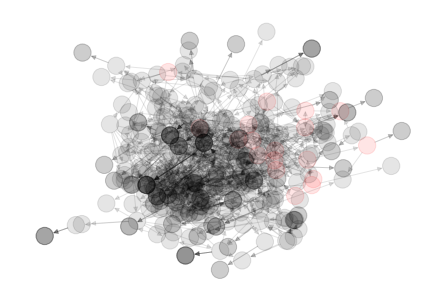

In [26]:
networkx.draw_kamada_kawai(G,node_color = Colours, with_labels=False, alpha=0.1)

In [27]:
def Colour1(node):
    if np.sum(BL19List.isin([node])):
        out = "red"
    elif np.sum(PL19List.isin([node])):
        out = "blue"
    elif np.sum(SA19List.isin([node])):
        out = "green" 
    elif np.sum(PD19List.isin([node])):
        out = "yellow"
    elif np.sum(L119List.isin([node])):
        out = "purple"
    else:
        out = "none"
    return(out)

In [28]:
j = 0
for i in G.nodes:
    Colours[j] = Colour1(i)
    j = j+1

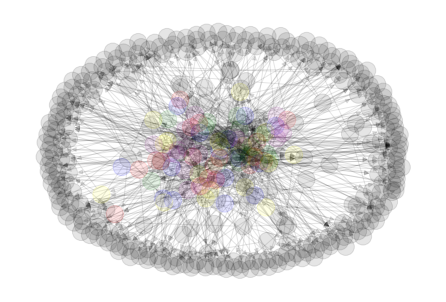

In [29]:
networkx.draw_spring(G,node_color = Colours, with_labels=False, alpha = 0.1)

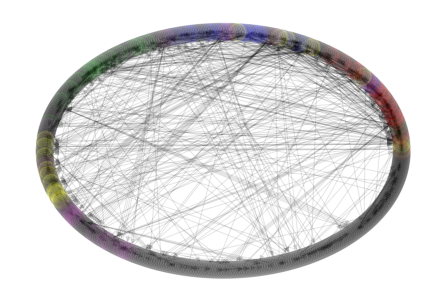

In [30]:
networkx.draw_circular(G,node_color = Colours, with_labels=False, alpha = 0.1)
# one can see blocks of the individual countries + crosslinks

In [31]:
net = Network("800px", "800px",notebook=True)
net.from_nx(G)
net.show("Test.html")
# net.save_graph("Test.html")

## Pyvis

In [32]:
g = Network(notebook=True)
G = nx.from_pandas_edgelist(DFun19, 
                            source = "club_involved_name",
                            target = "club_name",
                            edge_attr=["fee_cleaned"],#, "colour"],
                            create_using=networkx.DiGraph()
                           )

g.add_nodes(np.array(G.nodes), 
            color = random.choices(["red","grey"], k=len(G.nodes)),
            options = {
                "title":"lel"
            })

In [33]:
def Colour(node):
    # from https://www.hexcolortool.com/#f429ff,0.33
    if np.sum(BL19List.isin([node])):
        out = "rgba(244, 15, 11, 0.66)"
    elif np.sum(PL19List.isin([node])):
        out = "rgba(41, 155, 255, 0.66)"
    elif np.sum(SA19List.isin([node])):
        out = "rgba(41, 255, 77, 0.66)" 
    elif np.sum(PD19List.isin([node])):
        out = "rgba(255, 241, 41, 0.66)"
    elif np.sum(L119List.isin([node])):
        out = "rgba(244, 41, 255, 0.66)"
    else:
        out = "rgba(0, 0, 0, 0.22)"
    return(out)

In [34]:
# https://www.hexcolortool.com/#f40f0b,0.33
for node in G.nodes:
    g.add_node(str(node), color = Colour(node), #alpha=0.1,
              options = {"physics":False
              })

In [35]:
#var options = {
# "nodes": {
#    "color": {
#      "border": "rgba(43,124,233,0.46)",
#      "background": "rgba(90,65,252,0.51)"
#    }
#  },
#  "edges": {
#    "color": {
#      "inherit": true
#    },
#    "smooth": false
#  },
#  "physics": {
# "enabled": false,
#    "repulsion": {
#     "springLength": 500
#   },
#    "minVelocity": 0.75,
#    "solver": "repulsion"
#  }
#}

In [36]:
#g.add_edges(DF19["club_name"],DF19["club_involved_name"], value =DF19["fee_cleaned"])

In [37]:
for i in range(DFun19.shape[0]):
    g.add_edge(DFun19["club_name"].iloc[i], 
              DFun19["club_involved_name"].iloc[i],
              value=DFun19["fee_cleaned"].iloc[i], 
            kwargs ={
               "physics":False
           })


In [38]:
g.show("Test.html")

In [39]:
g.save_graph("2019_allLeagues.html")

In [40]:
DF19.shape[0]

851

## Analysis

In [42]:
G_undir = nx.from_pandas_edgelist(DFun19, 
                            source = "club_name",
                            target = "club_involved_name",
                            edge_attr="fee_cleaned",
                            create_using=networkx.Graph # or Graph, DiGraph, MultiGraph, MultiDiGraph
                           )

#### Small World

In [68]:
## Small world

# random reference graph
#G_ref = networkx.algorithms.smallworld.random_reference(G_undir, seed = 10)
#DFcon19 = DFun19.iloc[DFun19["club_name"]!="SC Paderborn 07"]
#DFcon19 = DFcon19.iloc[DFcon19["club_involved_name"]!="SC Paderborn 07"]
SepList = ["Vitória Setúbal FC","RKC Waalwijk","Covilhã","Luton Town",
         "Portimonense SC","Vitória Guimarães SC","FK Ufa", "VfL Bochum"]

DFcon19 = DFun19.drop(DFun19[ DFun19['club_name'].isin( SepList)].index)
DFcon19 = DFcon19.drop(DFcon19[ DFcon19['club_involved_name'].isin(SepList)].index)

#networkx.algorithms.smallworld.sigma(G_undir,niter=10, seed=10)

In [69]:
DFcon19

,club_name,club_involved_name,fee_cleaned
0,Bayern Munich,Atlético Madrid,72.000
1,Bayern Munich,VfB Stuttgart,31.500
2,Bayern Munich,Bor. M'gladbach,10.800
3,Bayern Munich,FC Barcelona,7.650
4,Bayern Munich,Inter Milan,4.500
...,...,...,...
525,Rubin Kazan,Torpedo Moscow,0.045
536,Dynamo Moscow,Krasnodar,3.870
537,Dynamo Moscow,Mladá Boleslav,3.150
545,Krylya Sovetov Samara,Al-Shorta SC,0.135


In [70]:
G_undirconnected = nx.from_pandas_edgelist(DFcon19, 
                            source = "club_name",
                            target = "club_involved_name",
                            edge_attr="fee_cleaned",
                            create_using=networkx.Graph # or Graph, DiGraph, MultiGraph, MultiDiGraph
                           )




In [71]:
Colour("SC Paderborn 07")

'rgba(244, 15, 11, 0.66)'

In [72]:
# Quick check: plot
nt = Network('800px', '800px',notebook=True)
#nt.from_nx(G_undirconnected)


for node in G_undirconnected.nodes:
    nt.add_node(str(node), color = Colour(node), #alpha=0.1,
              options = {
              })
    
for i in range(DFcon19.shape[0]):
    nt.add_edge(DFcon19["club_name"].iloc[i], 
              DFcon19["club_involved_name"].iloc[i],
              value=DFcon19["fee_cleaned"].iloc[i], 
            kwargs ={
               "physics":False
           })

nt.show('nx.html')
# Is connected!!

In [73]:
nt.save_graph("2019_connection.html")

In [49]:

start = time.time()

SW = networkx.algorithms.smallworld.sigma(G_undirconnected,niter=20, seed=10)
print(SW)

end = time.time()
print(end - start)

KeyboardInterrupt: 

#### Scaling Behaviour

In [50]:
networkx.classes.function.degree_histogram(G_undir)

[0, 200, 53, 39, 24, 30, 18, 11, 7, 20, 5, 12, 5, 9, 3, 6, 3, 0, 1, 1]

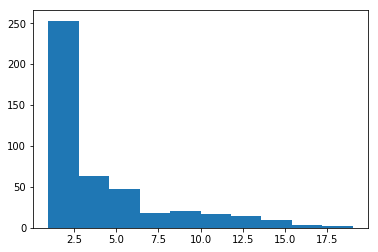

In [51]:
import networkx as nx

def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(G_undir)

0.011 497.70000000000005


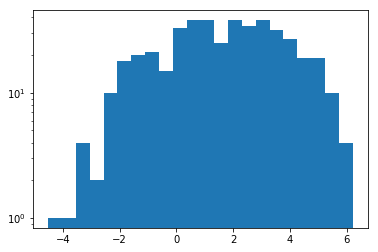

In [142]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(np.log(v), bins = int(len(G.nodes())/20), log = True)
    plt.show()

plot_strength_dist(G_undir)

In [145]:
degrees = [G.degree(n) for n in G.nodes()]
log_degrees = np.log(degrees)
print(np.mean(log_degrees), np.std(log_degrees), skew(log_degrees))


0.8666866724736374 0.9189072627650872 0.5440117992833565
0.5440117992833564


In [52]:
from networkx.algorithms import approximation

approximation.average_clustering(G_undir, trials=1000, seed=10)

0.032

networkx.algorithms.approximation.connectivity.all_pairs_node_connectivity(G_undir)

### Calculate Node Strength Distribution

In [75]:
G_dir = nx.from_pandas_edgelist(DF19, 
                            source = "club_involved_name",
                            target = "club_name",
                            edge_attr="fee_cleaned",
                            create_using=networkx.DiGraph # or Graph, DiGraph, MultiGraph, MultiDiGraph
                           )

In [76]:
networkx.algorithms.hierarchy.flow_hierarchy(G_dir)

0.7743830787309048

In [98]:
# Regular Clustering

Clust = networkx.algorithms.cluster.clustering(G_dir)
print(np.mean(list(Clust.values())))

0.016205497550080626


In [80]:
WeightClust = networkx.algorithms.cluster.clustering(G_dir, weight = "fee_cleaned")

In [103]:
# Weighted Clustering

np.mean(list(WeightClust.values()))  ## ?

0.000986778405677594

In [137]:
l=0
for n in G.nodes():
    l = l+1
print(l)
print(len(G.nodes()))
print(int(len(G.nodes())/20))

447
447
22


0.011 497.70000000000005


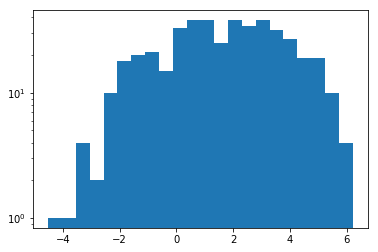

In [140]:
# Roughly symmetrical around 1.7?
def plot_strength_dist(G):
    strengths = [G.degree(n, weight="fee_cleaned") for n in G.nodes()]
    plt.hist(np.log(strengths), bins = int(len(G.nodes())/20), log = True)
    print(min(strengths), max(strengths))
    plt.show()

plot_strength_dist(G_dir)



In [134]:
strengths = [G.degree(n, weight="fee_cleaned") for n in G.nodes()]
log_strengths = np.log(strengths)
print(np.mean(log_strengths), np.std(log_strengths), skew(log_strengths))

1.6481320030615705 2.1365324213766983 -0.19066087747116742


### Disparity for undirected Network

In [164]:
A = networkx.linalg.graphmatrix.adjacency_matrix(G_undir, weight = "fee_cleaned")

In [165]:
print(A.shape)

(447, 447)


In [166]:
print(np.sum(A[i,i] for i in range(A.shape[0])))

0.0


/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


In [167]:
print(DF19)

                 club_name club_involved_name  fee_cleaned
0            Bayern Munich    Atlético Madrid       72.000
1            Bayern Munich      VfB Stuttgart       31.500
2            Bayern Munich    Bor. M'gladbach       10.800
3            Bayern Munich       FC Barcelona        7.650
4            Bayern Munich        Inter Milan        4.500
..                     ...                ...          ...
537          Dynamo Moscow     Mladá Boleslav        3.150
545  Krylya Sovetov Samara       Al-Shorta SC        0.135
558                 FK Ufa      Loko Tashkent        0.180
559                 FK Ufa              Anzhi        0.162
580               FC Sochi     Pyunik Yerevan        0.450

[851 rows x 3 columns]


In [168]:
print(A)

  (0, 1)	72.0
  (0, 2)	31.5
  (0, 3)	10.8
  (0, 4)	7.65
  (0, 5)	4.5
  (0, 6)	2.7
  (0, 7)	27.45
  (0, 34)	3.15
  (0, 92)	18.0
  (1, 0)	72.0
  (1, 4)	108.0
  (1, 15)	1.8
  (1, 29)	113.4
  (1, 31)	6.75
  (1, 48)	22.5
  (1, 81)	63.0
  (1, 86)	27.0
  (1, 145)	19.8
  (1, 222)	18.0
  (1, 223)	18.0
  (1, 224)	0.45
  (1, 284)	27.0
  (2, 0)	31.5
  (2, 21)	13.5
  (2, 38)	0.45
  :	:
  (428, 429)	0.018
  (428, 443)	0.135
  (429, 428)	0.018
  (430, 431)	0.252
  (430, 444)	0.18
  (430, 445)	0.162
  (431, 430)	0.252
  (432, 196)	11.97
  (432, 433)	0.09
  (432, 446)	0.45
  (433, 432)	0.09
  (434, 402)	0.117
  (435, 417)	0.392
  (436, 417)	0.198
  (437, 420)	0.09
  (438, 364)	3.87
  (438, 395)	6.3
  (439, 395)	0.45
  (440, 395)	0.27
  (441, 395)	0.045
  (442, 364)	3.15
  (443, 428)	0.135
  (444, 430)	0.18
  (445, 430)	0.162
  (446, 432)	0.45


In [173]:
strengths_undir = [G_undir.degree(n, weight="fee_cleaned") for n in G_undir.nodes()]

In [174]:
strengths_undir

[177.75,
 497.70000000000005,
 64.80000000000001,
 34.29,
 388.71,
 205.03400000000002,
 19.35,
 133.65,
 107.415,
 30.15,
 113.39999999999999,
 72.45,
 180.45,
 100.80000000000001,
 7.2,
 166.06999999999994,
 182.039,
 20.880000000000003,
 86.39999999999999,
 234.00500000000002,
 36.45,
 38.745000000000005,
 20.700000000000003,
 49.05,
 39.870000000000005,
 16.38,
 3.15,
 0.99,
 169.64999999999998,
 253.35000000000002,
 45.9,
 117.675,
 5.58,
 108.68,
 12.555000000000001,
 50.26500000000001,
 23.85,
 1.35,
 15.53,
 2.52,
 120.69000000000001,
 63.0,
 6.3,
 16.380000000000003,
 34.02,
 50.44500000000001,
 25.47,
 132.827,
 108.44999999999999,
 73.35000000000001,
 2.88,
 0.315,
 18.9,
 21.869999999999997,
 2.925,
 8.55,
 3.6,
 3.6,
 0.9,
 6.12,
 21.6,
 21.645,
 36.0,
 9.72,
 6.525,
 0.135,
 6.660000000000001,
 69.84,
 6.300000000000001,
 0.45,
 0.36,
 378.40500000000003,
 27.99,
 16.2,
 15.3,
 256.09999999999997,
 117.005,
 253.13000000000002,
 148.05,
 2.16,
 0.18,
 207.11000000000004,


In [177]:
np.sum(A[2,:])

64.80000000000001

In [191]:
print(np.array((A[j,:]/np.sum(A[j,:]))))
testarr = ((A[j,:]/np.sum(A[j,:]))).toarray()
testarr**2.

  (0, 1)	0.4050632911392405
  (0, 2)	0.17721518987341772
  (0, 3)	0.06075949367088608
  (0, 4)	0.043037974683544304
  (0, 5)	0.02531645569620253
  (0, 6)	0.01518987341772152
  (0, 7)	0.15443037974683543
  (0, 34)	0.017721518987341773
  (0, 92)	0.10126582278481013


array([[0.        , 0.16407627, 0.03140522, 0.00369172, 0.00185227,
        0.00064092, 0.00023073, 0.02384874, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00031405,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [195]:
j = 0
Y = np.zeros(A.shape[0])
for i in G_undir.nodes:
    row = (A[j,:]/np.sum(A[j,:]))
    row = row.toarray()
    Y[j] = np.sum(row**2)
    j = j+1
    
    
print(j)

447


In [197]:
degrees_undir = [G_undir.degree(n) for n in G_undir.nodes()]

In [211]:
import sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.log(degrees_undir).reshape(-1, 1), np.log(Y).reshape(-1, 1))

In [229]:
print(reg.coef_) # reasonably close to -1?

[[-0.71413944]]


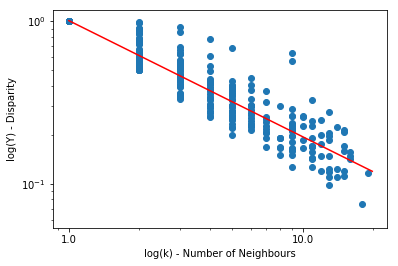

In [228]:
import matplotlib.pylab as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

x = degrees_undir
y = Y

plt.scatter(x, y)
plt.xscale('log')
plt.yscale('log')

plt.plot(np.exp(np.arange(0,3,0.01)), 
        np.exp(reg.predict(np.arange(0,3,0.01).reshape(-1, 1))), color="red")

ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel("log(k) - Number of Neighbours")
plt.ylabel("log(Y) - Disparity")
plt.show()
